<a href="https://colab.research.google.com/github/NileshCT/Linear_Regression_Modelling/blob/main/LR_L1_L2_algoridhm_Boston_House_Price_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Boston Housing Dataset**

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

**CRIM**- per capita crime rate by town

**ZN**- proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS**- proportion of non-retail business acres per town.

**CHAS**- Charles River dummy variable (1 if tract bounds river; 0 otherwise)

**NOX**- nitric oxides concentration (parts per 10 million)

**RM**- average number of rooms per dwelling

**AGE** - proportion of owner-occupied units built prior to 1940

**DIS** - weighted distances to five Boston employment centres

**RAD** index of accessibility to radial highways

**TAX**- full-value property-tax rate per $10,000

**PTRATIO** - pupil-teacher ratio by town

**B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

**LSTAT**- % lower status of the population

**MEDV**- Median value of owner-occupied homes in $1000's

In [146]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import seaborn as sns


In [147]:
#Installing independances.
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [148]:
pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [149]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [150]:
#Importing independances to import the boston housing dataset.
import pandas as pd
#import boston data from sklearn
from sklearn.datasets import load_boston

#pandas daraframe
boston_dataset = load_boston()
type(boston_dataset)
boston_df = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)


/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


In [151]:
#Giving new name to boston_df dataframe.
df=boston_df.copy()

In [152]:
#Exploring top five records.
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [153]:
#Exploring last five records.
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [154]:
#Exploring non null values from dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [155]:
#Exploring the datatypes of each feature,
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [156]:
#Exploring the stats information of all numeric feature.
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [157]:
#Counting all null values from dataframe.
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

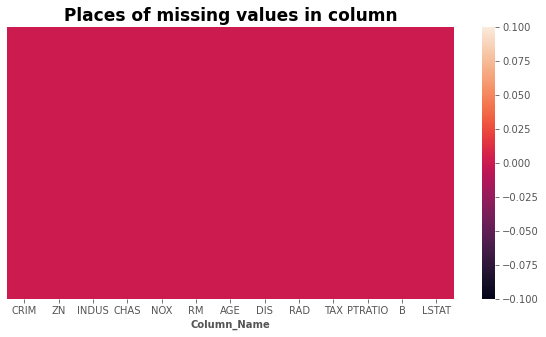

In [158]:
#Visualling the heatmap for all missing values.
lt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=10, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

**Distribution of Data**

In [159]:
#Lets explore all the feature name. 
numeric_features = df.describe().columns
numeric_features

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

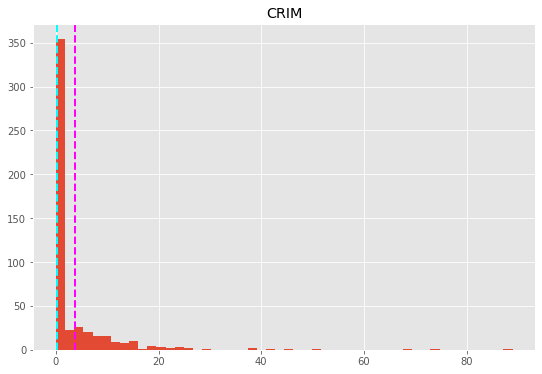

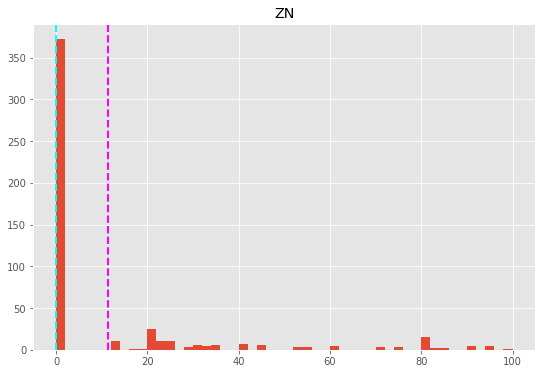

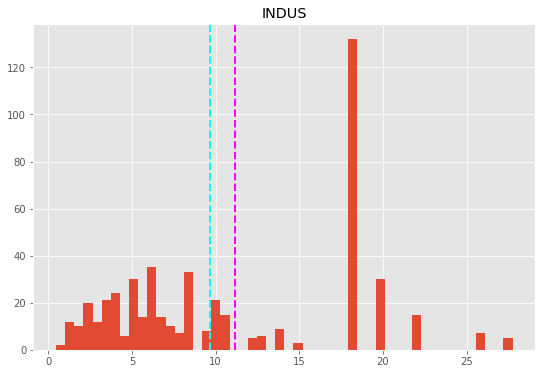

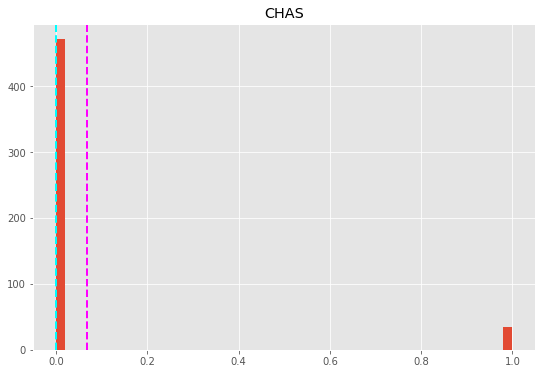

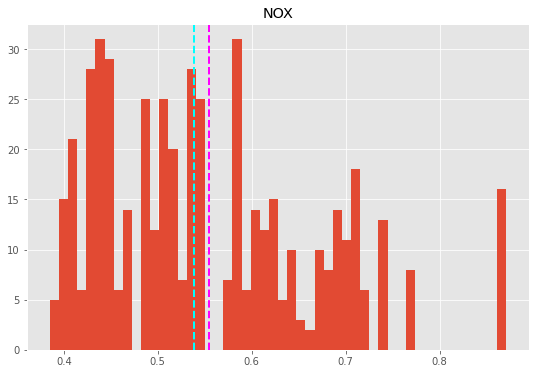

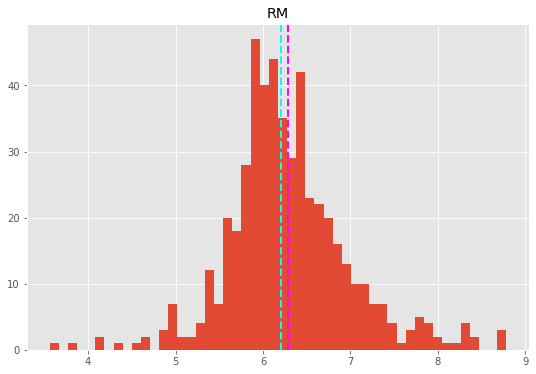

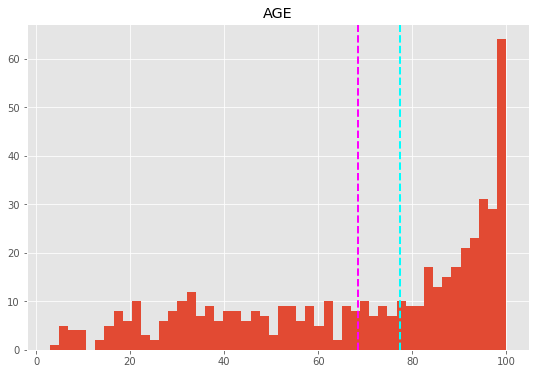

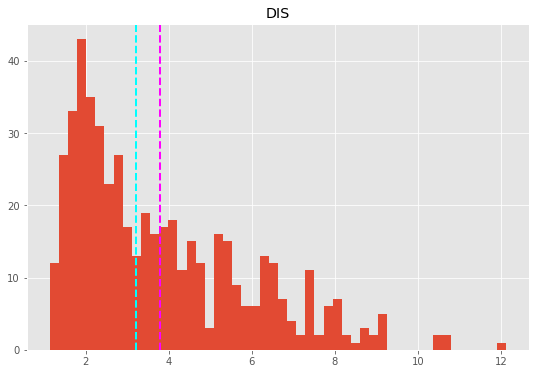

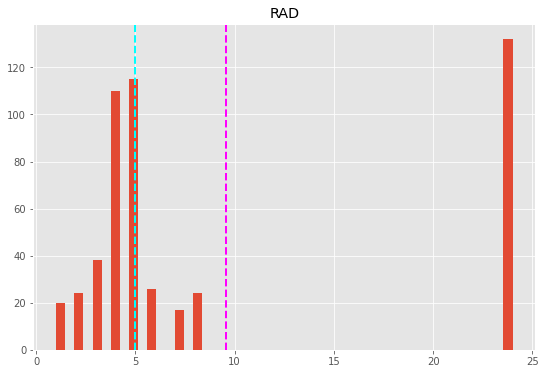

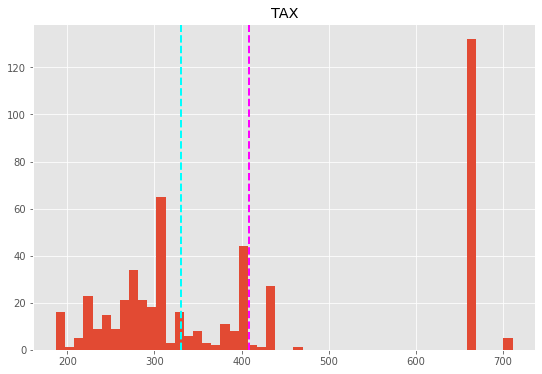

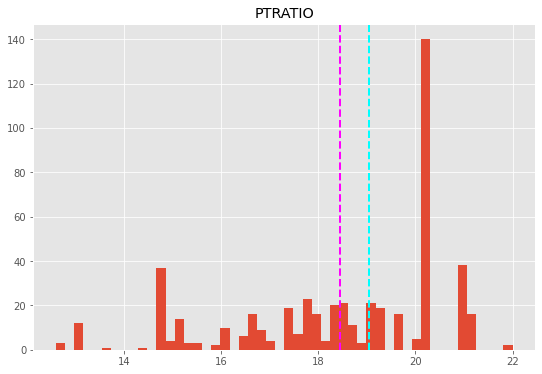

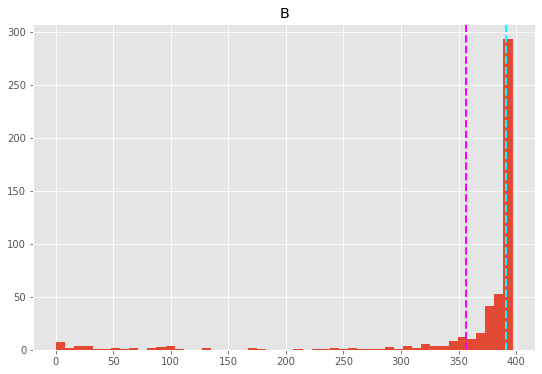

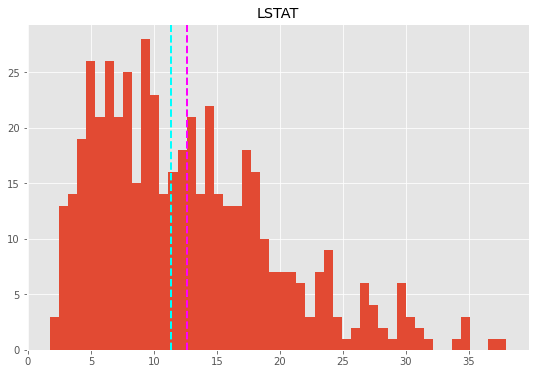

In [160]:
# plot a bar plot for each numerical feature count

for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [161]:
df.rename(columns = {'House Price':'House_Price'}, inplace = True)

In [162]:
df.shape

(506, 13)

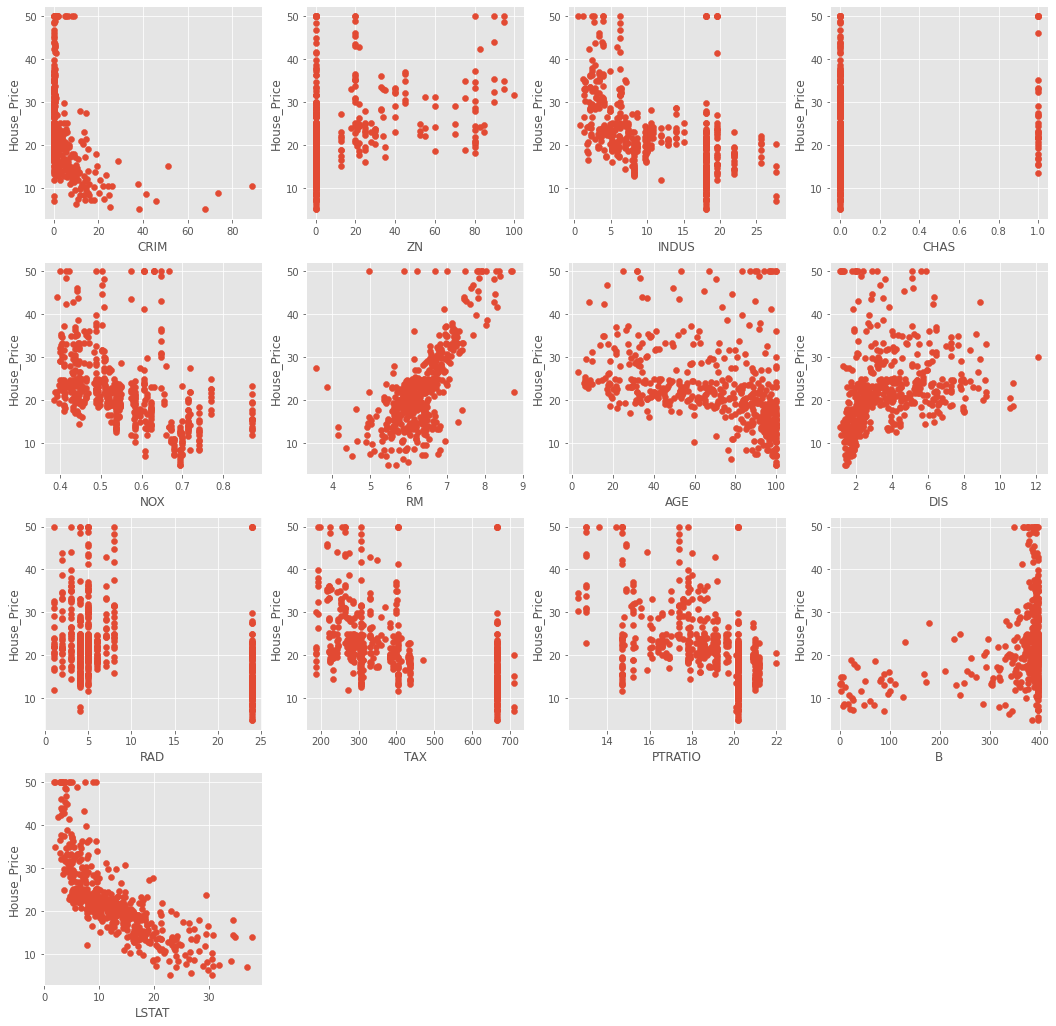

In [163]:
# Generate scatter plot of independent vs Dependent variable
plt.style.use('ggplot')
fig = plt.figure(figsize = (18, 18))

for index, feature_name in enumerate(boston_dataset.feature_names):
	ax = fig.add_subplot(4, 4, index + 1)
	ax.scatter(boston_dataset.data[:, index], boston_dataset.target)
	ax.set_ylabel('House_Price', size = 12)
	ax.set_xlabel(feature_name, size = 12)

plt.show()

In [164]:
# Load the dataset into Pandas Dataframe
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House_Price'] = pd.Series(boston_pd_target)

# input
X = boston_pd.iloc[:, :-1]

#output
Y = boston_pd.iloc[:, -1]

print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House_Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [165]:
df=boston_pd.copy()

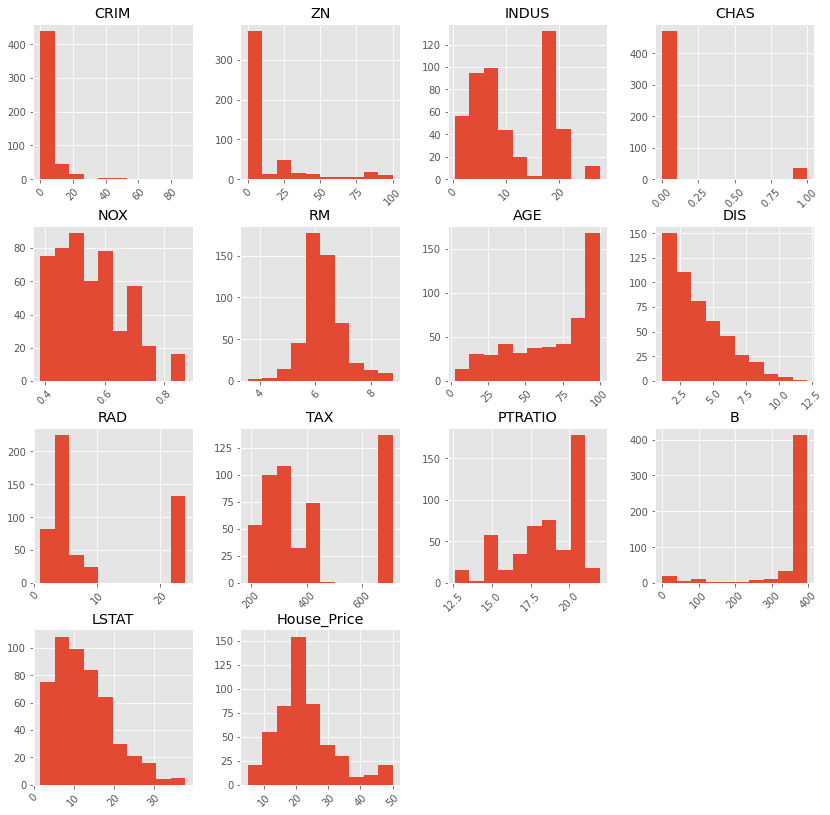

In [167]:
#Exploring histgram to explore the skewness in data.
df.hist(figsize=(14,14), xrot=45)
plt.show()

<ipython-input-168-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


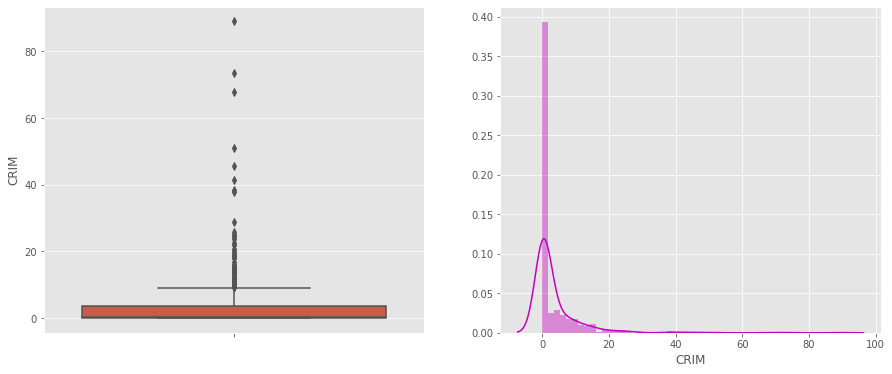

<ipython-input-168-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


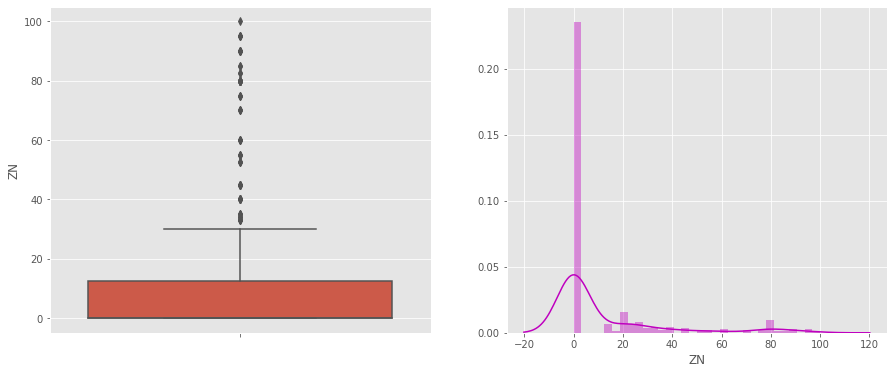

<ipython-input-168-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


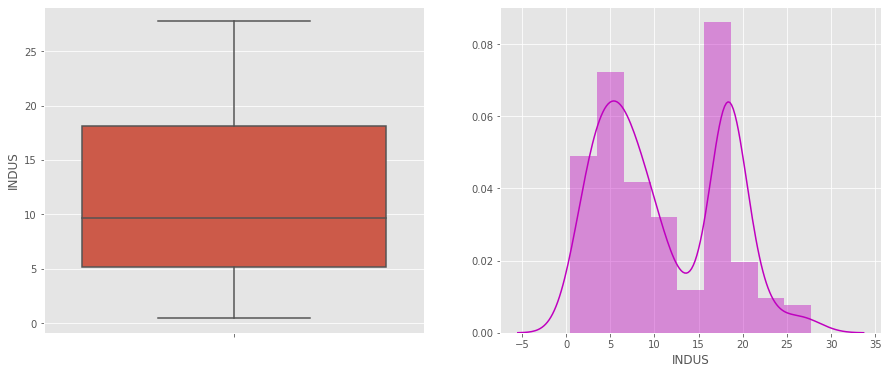

<ipython-input-168-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


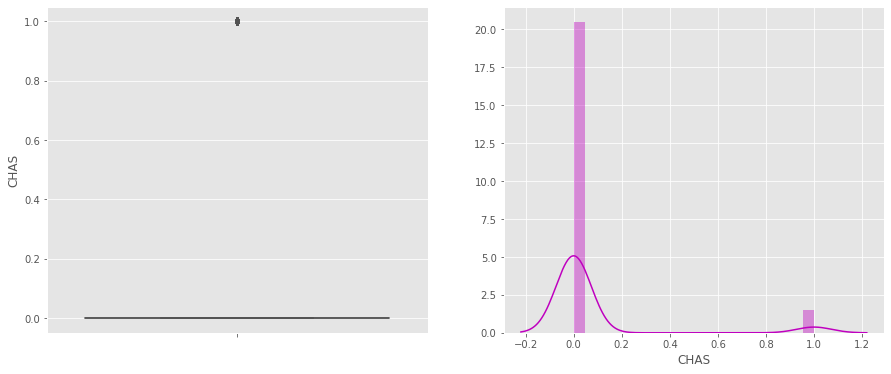

<ipython-input-168-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


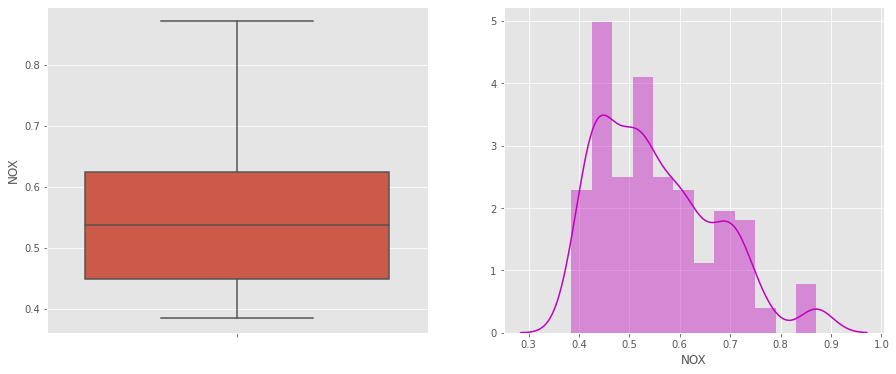

<ipython-input-168-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


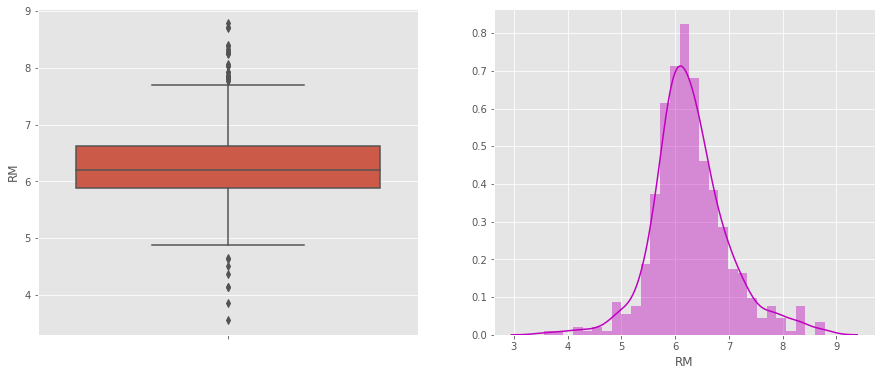

<ipython-input-168-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


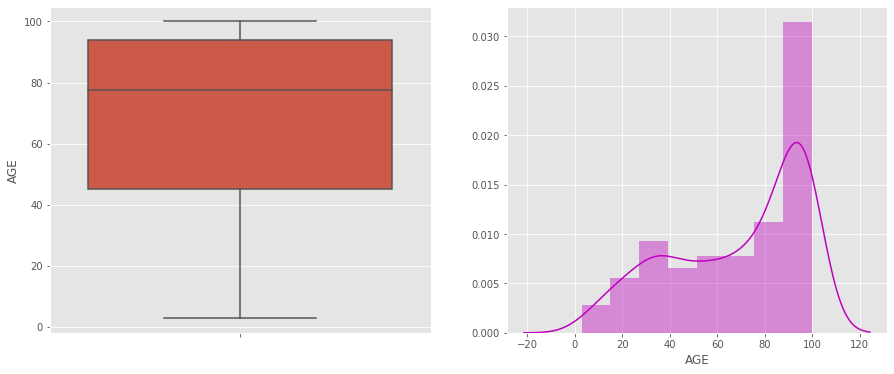

<ipython-input-168-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


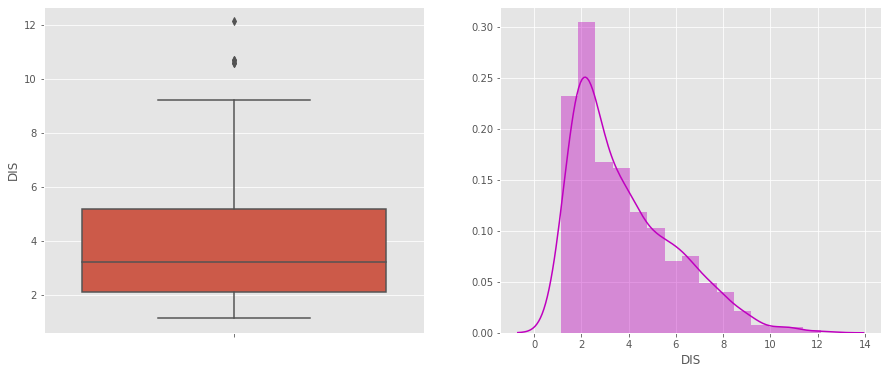

<ipython-input-168-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


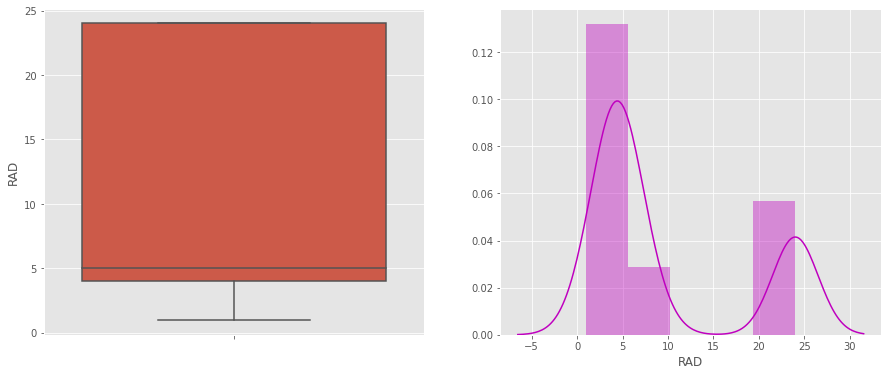

<ipython-input-168-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


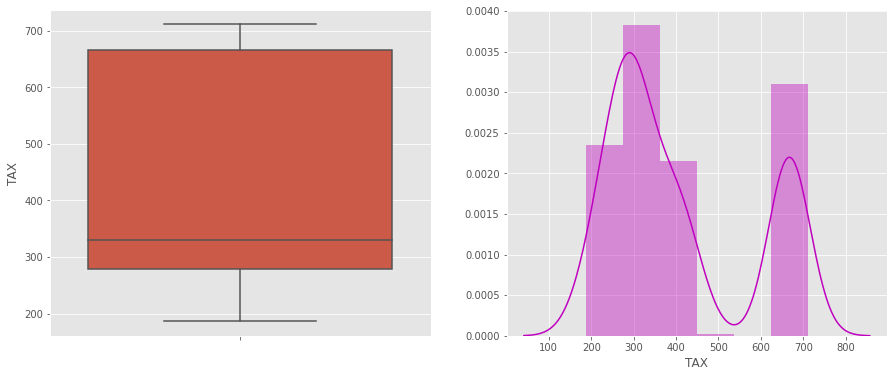

<ipython-input-168-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


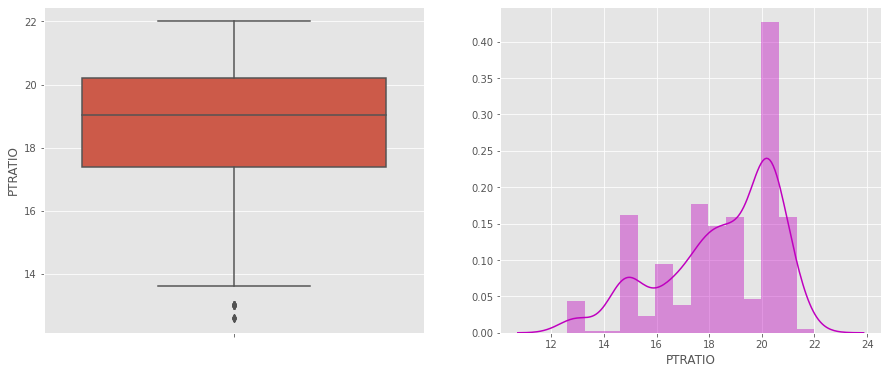

<ipython-input-168-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


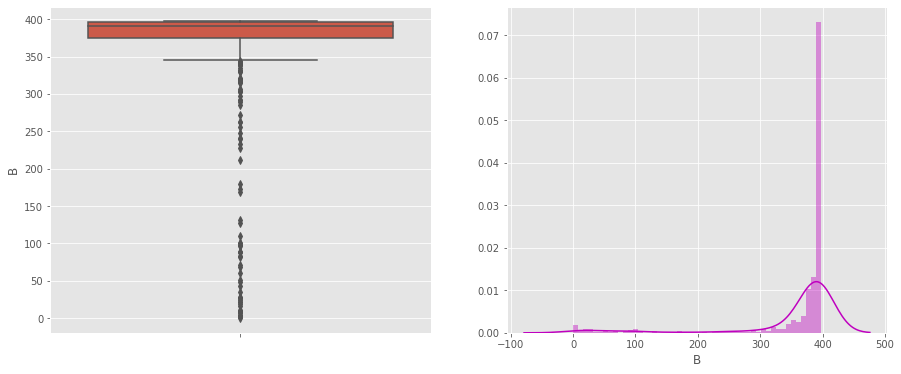

<ipython-input-168-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


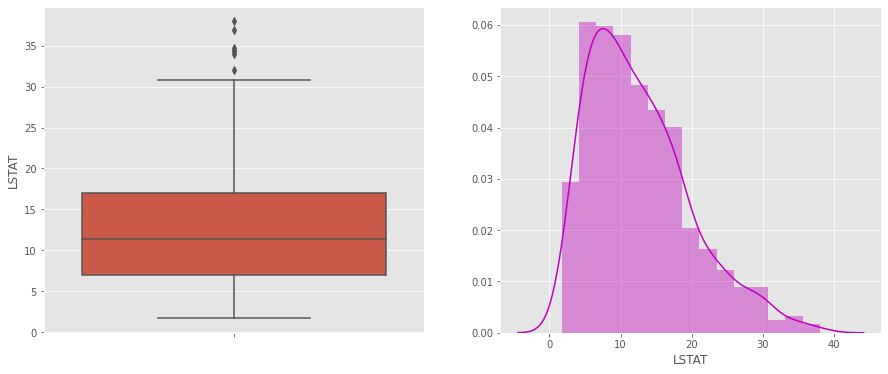

<ipython-input-168-00788d962b22>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[var].dropna(),color="m")


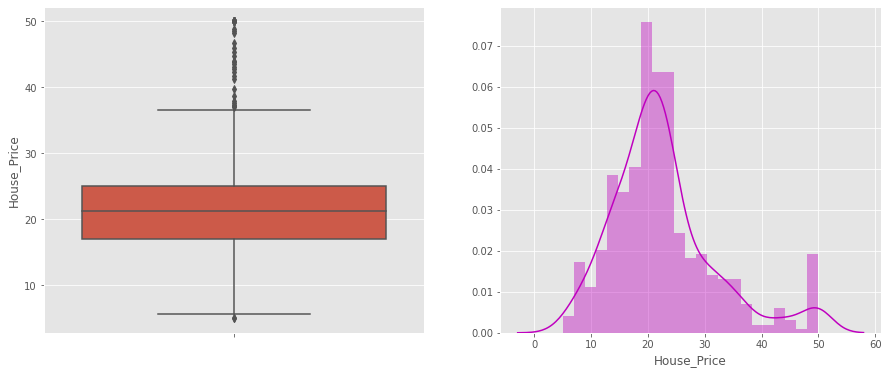

In [168]:
#Box plot with distplot 
numeric_features =df.describe().columns
numeric_features

for var in numeric_features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna(),color="m")
    fig.set_ylabel('')
    fig.set_xlabel(var)

    plt.show()
     

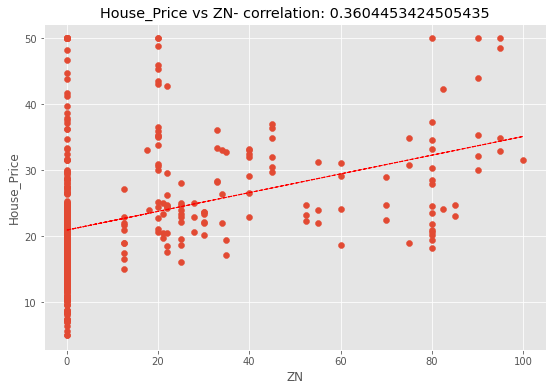

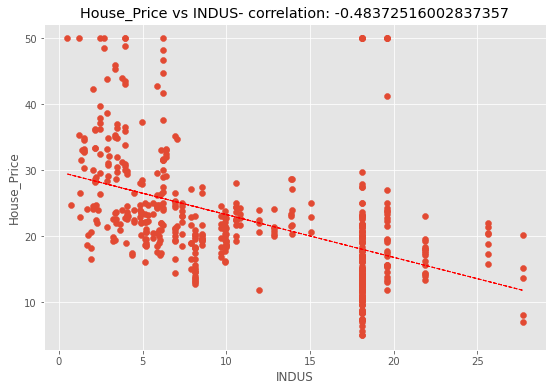

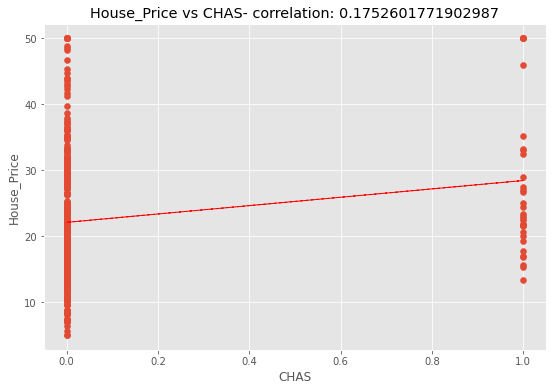

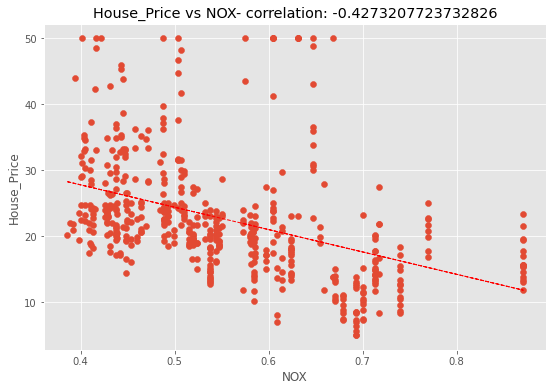

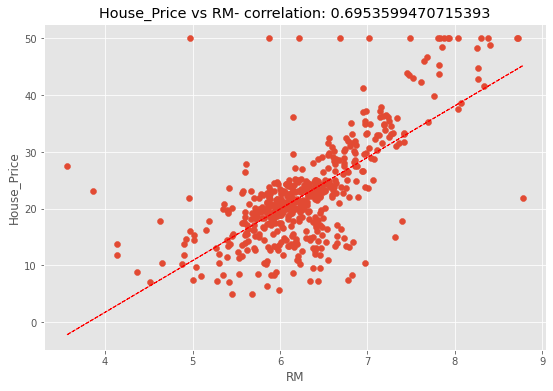

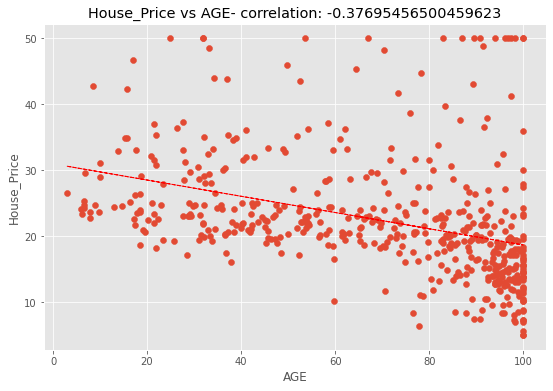

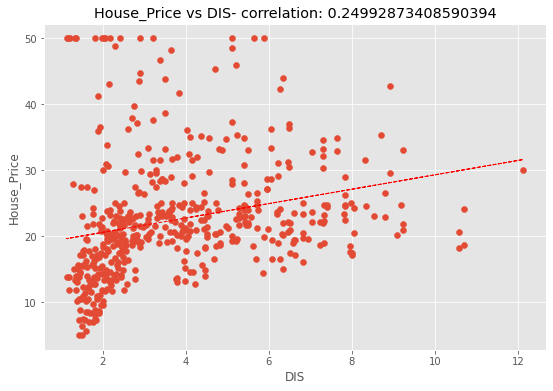

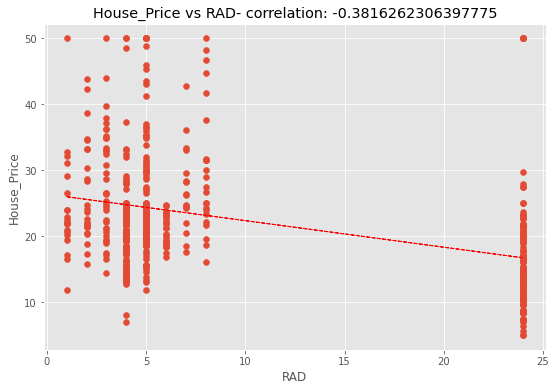

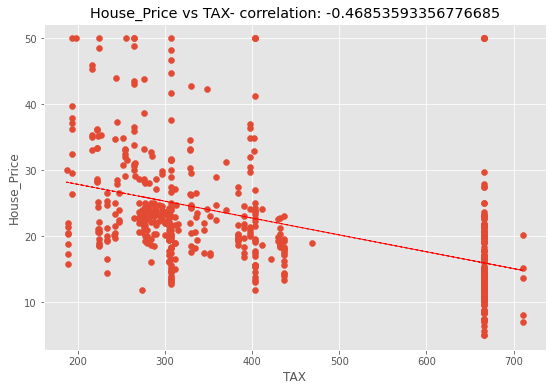

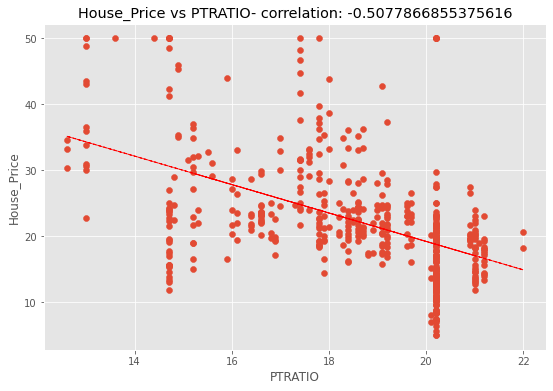

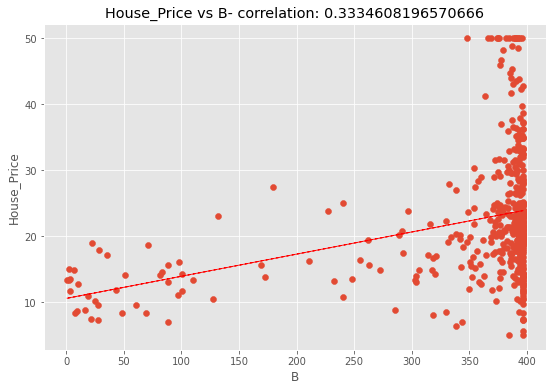

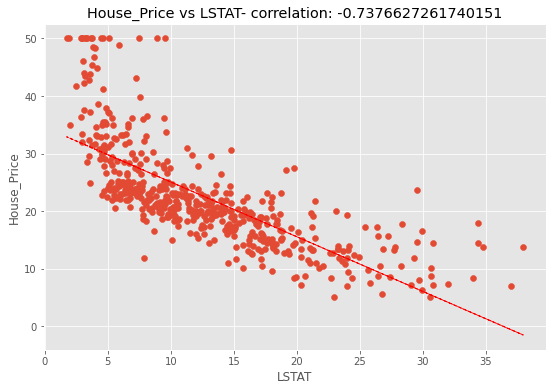

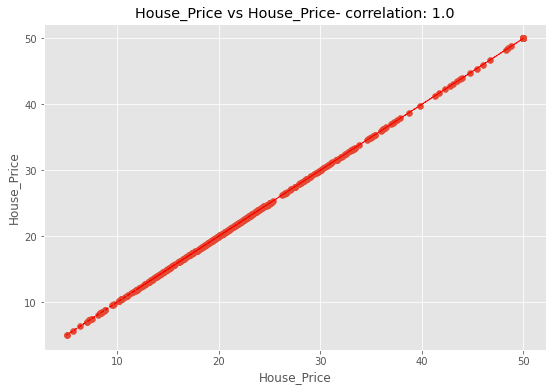

In [169]:
# Co relation plot with the response
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['House_Price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('House_Price')
    ax.set_title('House_Price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['House_Price'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

**Distribution plot of different variables**

<ipython-input-182-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-182-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


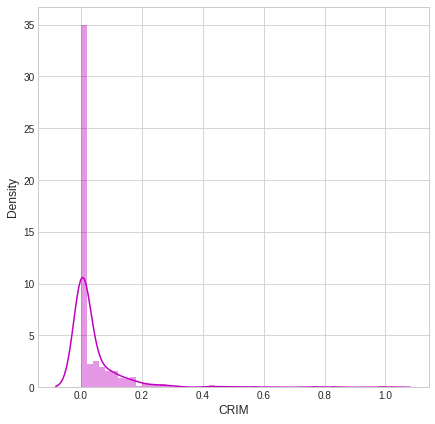

<ipython-input-182-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-182-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


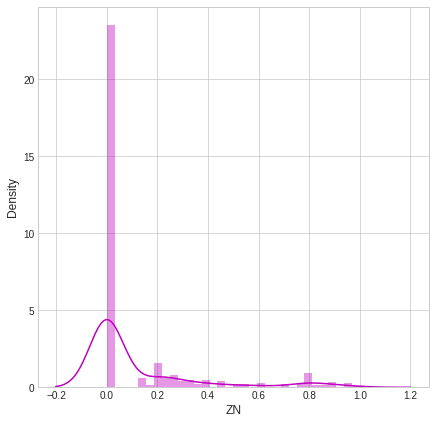

<ipython-input-182-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-182-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


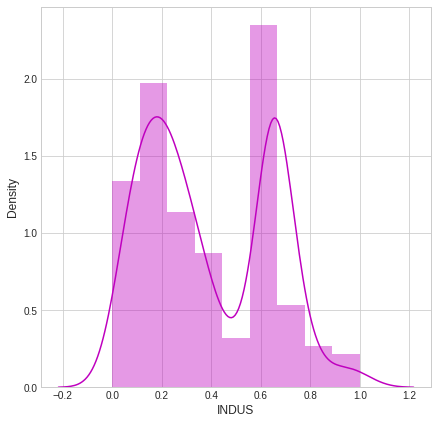

<ipython-input-182-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-182-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


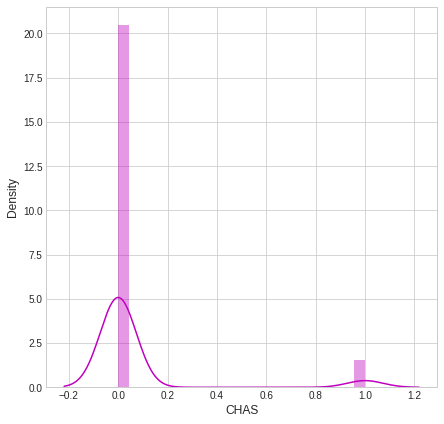

<ipython-input-182-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-182-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


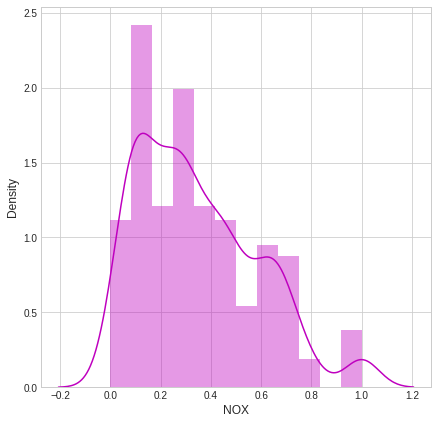

<ipython-input-182-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-182-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


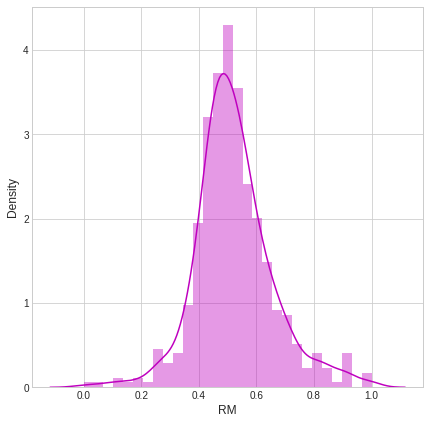

<ipython-input-182-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-182-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


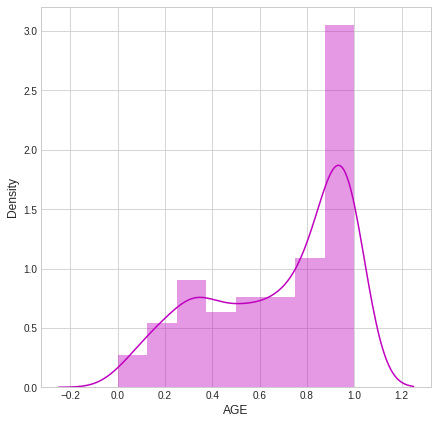

<ipython-input-182-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-182-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


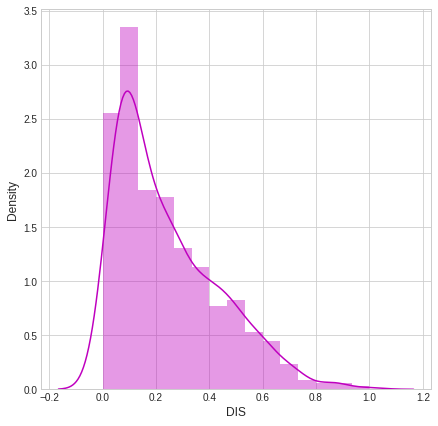

<ipython-input-182-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-182-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


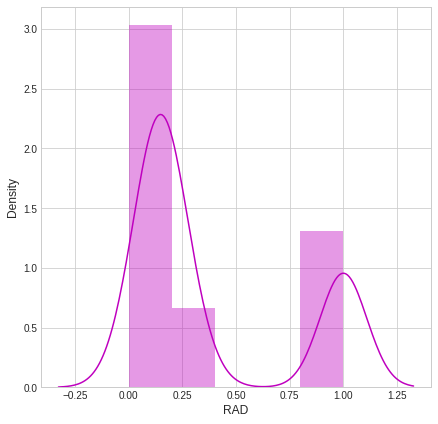

<ipython-input-182-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-182-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


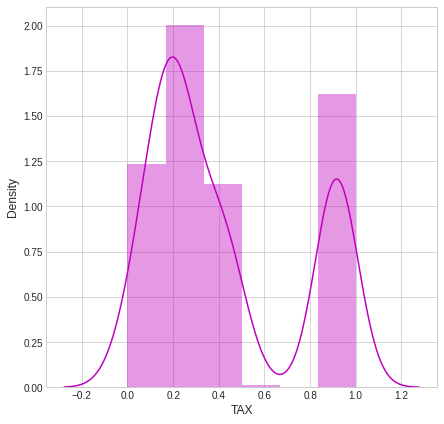

<ipython-input-182-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-182-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


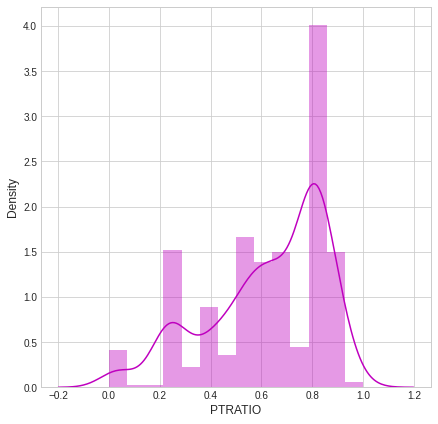

<ipython-input-182-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-182-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


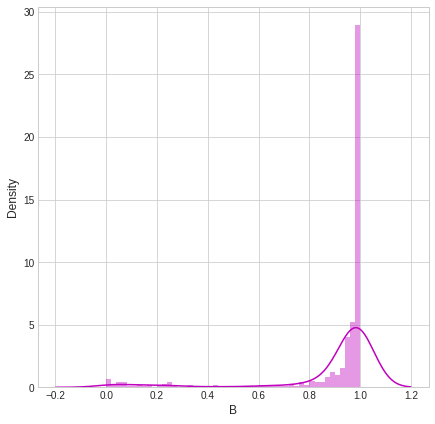

<ipython-input-182-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-182-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


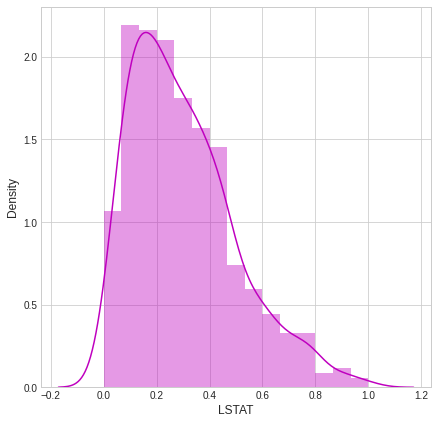

<ipython-input-182-bc5396d022c7>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-182-bc5396d022c7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[val],color="m")


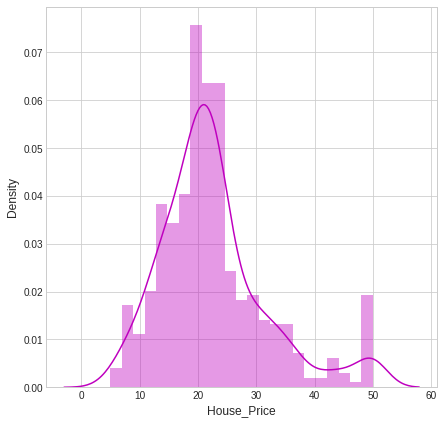

In [182]:
#distplot for numerical features
for val in numeric_features:
  plt.figure(figsize=(7,7))
  plt.style.use('seaborn-whitegrid')
  sns.distplot(df[val],color="m")
  plt.show()

<Axes: >

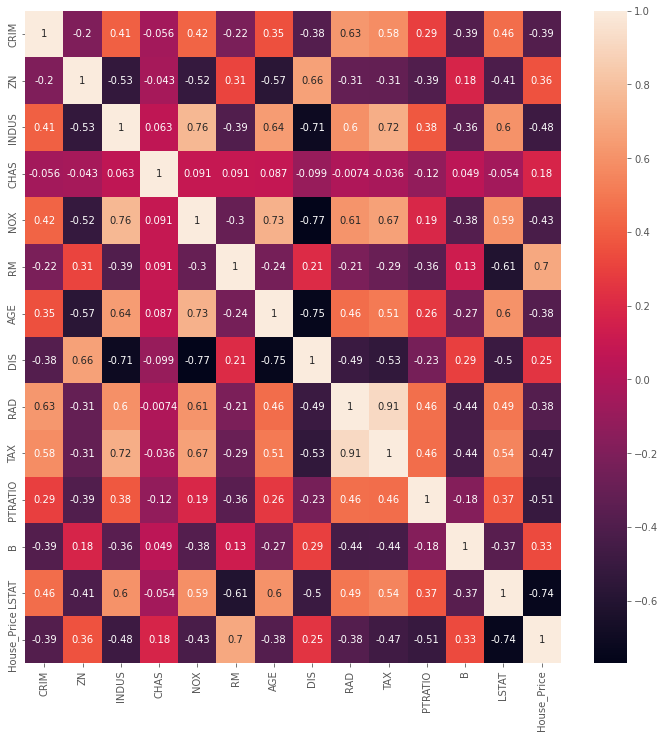

In [170]:
#Heatmap with all corr values to check the relation of dependant and independant variable.
plt.figure(figsize=(12,12))
corr=df.corr()
sns.heatmap(corr,annot=True)
     

In [191]:
df4=df.copy()

In [195]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
     
calc_vif(df4[[i for i in df4.describe().columns if i not in ['House_Price']]])

,variables,VIF
0,CRIM,2.098176
1,ZN,2.845295
2,INDUS,13.291853
3,CHAS,1.153803
4,NOX,12.784831
5,RM,16.662011
6,AGE,19.608991
7,DIS,7.977453
8,RAD,14.588185
9,TAX,24.552717


In [196]:
df5=df4.copy()

In [197]:
df5.drop(["RM"],axis=1,inplace=True)

In [199]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
     
calc_vif(df5[[i for i in df5.describe().columns if i not in ['House_Price']]])

,variables,VIF
0,CRIM,2.096580
1,ZN,2.705272
2,INDUS,13.278902
3,CHAS,1.151788
4,NOX,12.556662
5,AGE,16.172540
6,DIS,7.283657
7,RAD,14.340524
8,TAX,24.383905
9,PTRATIO,13.219907


In [200]:
df6=df5.copy()

In [202]:
df6.drop(["TAX"],axis=1,inplace=True)

In [203]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
     
calc_vif(df6[[i for i in df6.describe().columns if i not in ['House_Price']]])

,variables,VIF
0,CRIM,2.096233
1,ZN,2.584807
2,INDUS,10.626518
3,CHAS,1.133721
4,NOX,12.489474
5,AGE,16.172490
6,DIS,7.283085
7,RAD,5.429652
8,PTRATIO,13.135931
9,B,13.435270


In [204]:
df7=df6.copy()

In [205]:
df7.drop(["B"],axis=1,inplace=True)

In [206]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
     
calc_vif(df7[[i for i in df7.describe().columns if i not in ['House_Price']]])

,variables,VIF
0,CRIM,2.078390
1,ZN,2.553007
2,INDUS,10.581452
3,CHAS,1.124311
4,NOX,12.221954
5,AGE,13.637953
6,DIS,5.635347
7,RAD,5.132954
8,PTRATIO,11.808009
9,LSTAT,6.815454


In [207]:
df8=df7.copy()

In [208]:
df8.drop(["AGE"],axis=1,inplace=True)

In [209]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
     
calc_vif(df8[[i for i in df8.describe().columns if i not in ['House_Price']]])

,variables,VIF
0,CRIM,2.078179
1,ZN,2.552593
2,INDUS,10.515101
3,CHAS,1.107274
4,NOX,8.860470
5,DIS,5.625067
6,RAD,4.969626
7,PTRATIO,10.223137
8,LSTAT,6.382317


In [211]:
#here appling min max scaling on dataframe.
#applying min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df8[['CRIM','ZN','INDUS','CHAS','NOX','DIS','RAD','PTRATIO','LSTAT']] = scaler.fit_transform(df8[['CRIM','ZN','INDUS','CHAS','NOX','DIS','RAD','PTRATIO','LSTAT']])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [224]:
#Train-Test split and training of model with training data.
X = df8.drop(["House_Price"],axis=1)
y = df8.House_Price
     

# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state =0,test_size=0.20)
     

# Fitting the linear regression model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred_train = regr.predict(X_train)
y_pred_train 

array([32.00278682, 22.68683568, 25.39919702, 24.35957647,  9.03335464,
       19.84003787, 22.81917212, 29.59072993, 33.19420602, 13.20514499,
       18.72570755, 23.19310575, 10.57585525, 23.65595093,  3.49675313,
       18.84014022, 10.71177839, 43.00837468, 32.52942864, 12.35709746,
       17.99193637, 22.69170547, 25.10099994, 17.34029286, 32.43849721,
       13.70636511, 21.55988954, 33.86719836, 17.52356325, 11.03129191,
       15.38962812, 24.99585266, 12.45097793, 28.62874226, 26.43860126,
       15.8015995 , 22.66458945,  7.80538343, 12.07544771, 22.24488118,
       32.04771989, 27.71572657, 26.79736461, 15.8659712 , 31.86216483,
       25.55551421, 14.34130643,  6.98235996, 28.68242262, 25.64789503,
        3.23343744, 28.03130768, 14.94864907, 32.67626979, 16.93977881,
       14.19911892, 20.0095517 , 12.83075479,  8.71429823, 19.60133701,
       33.71003869, 30.57606968, 19.92168944, 18.90836537, 23.87431087,
       26.71033717, 21.9228817 , 17.47007972, 33.84771102, 11.96

In [225]:
MSE_train = mean_squared_error(y_train, y_pred_train)
print(f'MSE= {MSE_train}')

RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, y_pred_train)
print(f'R2_Score= {R2_Score_train}')

MSE= 23.43466560587882
RMSE= 4.8409364389422445
R2_Score= 0.7247634288898654


In [227]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred_test = regr.predict(X_test)
     

In [228]:
MSE_test = mean_squared_error(y_test, y_pred_test)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')

R2_Score_test = r2_score(y_test, y_pred_test)
print(f'R2_Score= {R2_Score_test}')

MSE= 41.137519431942906
RMSE= 6.413853711454831
R2_Score= 0.4948015717129062


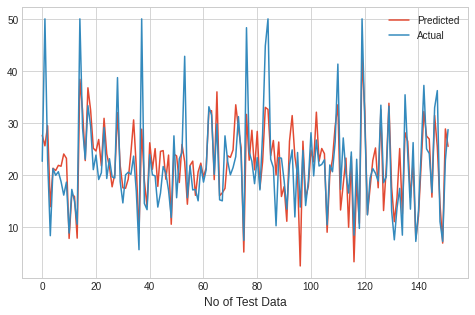

In [222]:
#Plot the figure
plt.figure(figsize=(8,5))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

**Conclusion**

**Implementation of linear regression on Boston Housing Dataset with data pre-processing steps, finally train and test r2 score is  as 76% and 57%.**